In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [106]:
df=pd.read_csv("honeyproduction 1998-2021.csv")
df.head(10)


,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.00000,71,1136000.00000,159000.00000,0.72000,818000.00000,1998
1,Arizona,55000.00000,60,3300000.00000,1485000.00000,0.64000,2112000.00000,1998
2,Arkansas,53000.00000,65,3445000.00000,1688000.00000,0.59000,2033000.00000,1998
3,California,450000.00000,83,37350000.00000,12326000.00000,0.62000,23157000.00000,1998
4,Colorado,27000.00000,72,1944000.00000,1594000.00000,0.70000,1361000.00000,1998
5,Florida,230000.00000,98,22540000.00000,4508000.00000,0.64000,14426000.00000,1998
6,Georgia,75000.00000,56,4200000.00000,307000.00000,0.69000,2898000.00000,1998
7,Hawaii,8000.00000,118,944000.00000,66000.00000,0.77000,727000.00000,1998
8,Idaho,120000.00000,50,6000000.00000,2220000.00000,0.65000,3900000.00000,1998
9,Illinois,9000.00000,71,639000.00000,204000.00000,1.19000,760000.00000,1998


In [10]:
df.shape

(985, 8)

In [11]:
df.dtypes

State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [16]:
df.year = df.year.astype('category')
# convert year into  python categories data type.

In [17]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
count,985.00000,985.00000,985.00000,985.00000,985.00000,985.00000
mean,62892.38579,58.40203,4035131.97970,1167186.80203,1.96959,5939910.65990
std,94163.79192,19.29170,6752289.66788,2088588.60706,1.17792,9806594.83367
min,2000.00000,3.00000,84000.00000,8000.00000,0.49000,162000.00000
25%,9000.00000,45.00000,469000.00000,108000.00000,1.20000,1037000.00000
50%,26000.00000,55.00000,1488000.00000,360000.00000,1.70000,2409000.00000
75%,68000.00000,70.00000,3780000.00000,1217000.00000,2.36000,5897000.00000
max,530000.00000,136.00000,46410000.00000,13800000.00000,8.23000,83859000.00000


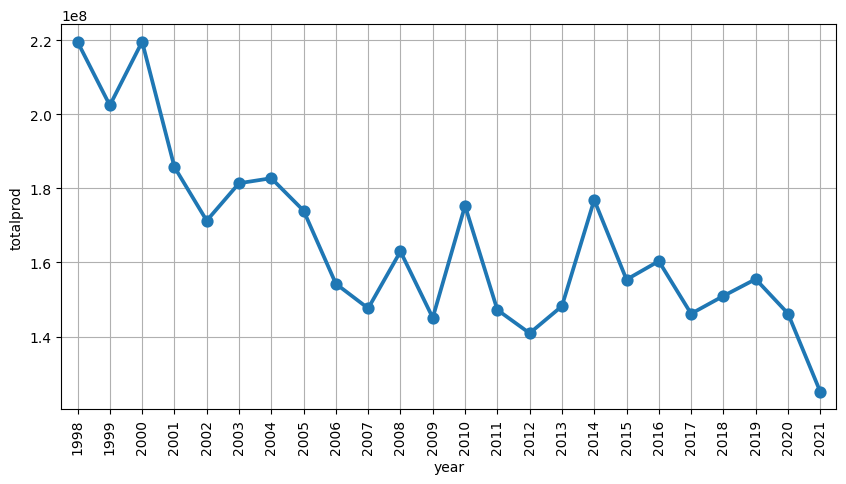

In [88]:
# Q1)How has honey production yield changed from 1998 to 2021?

plt.figure(figsize=(10,5))
sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, errorbar=None)
plt.xticks(rotation=90)
# To rotate the x axis labls
plt.grid()
plt.show()


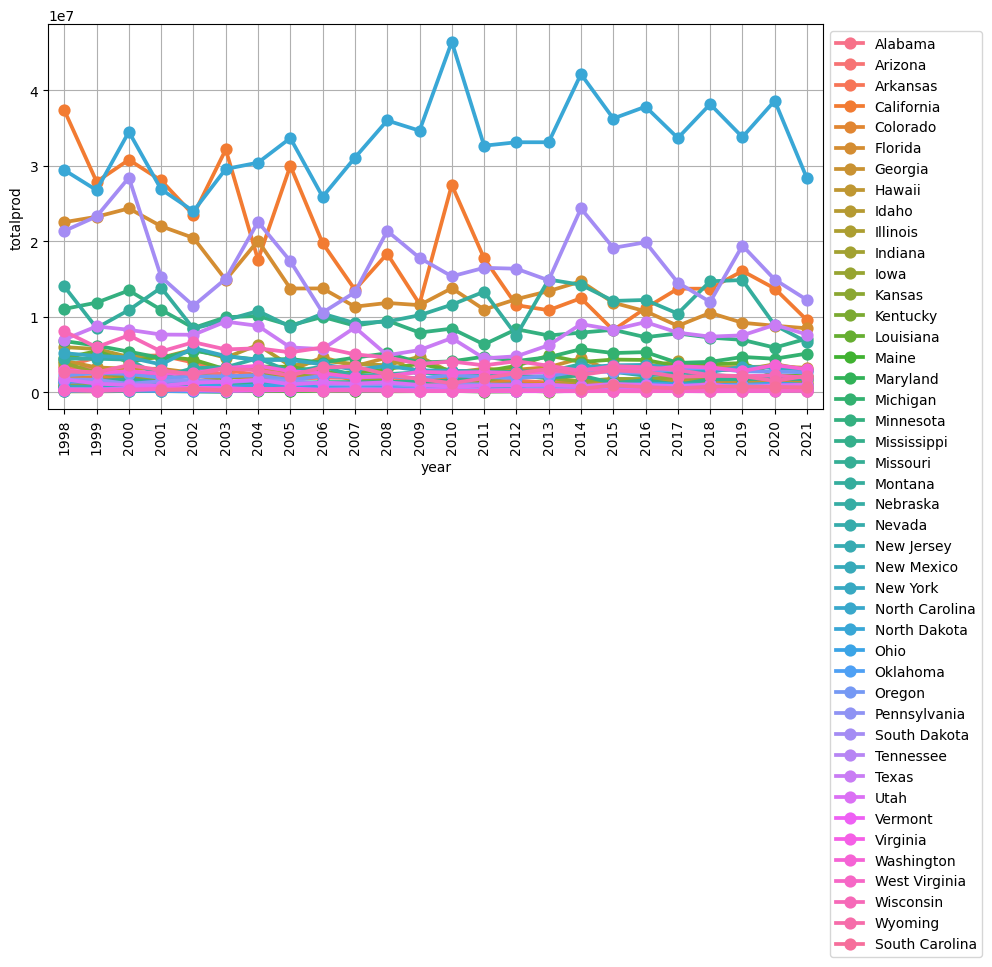

In [89]:
# Q2)Overtime,what are the major production trends across the states?

plt.figure(figsize=(10,5)) 
sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, errorbar=None, hue = 'State')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
# To rotate the x axis labels
plt.grid()
plt.show()

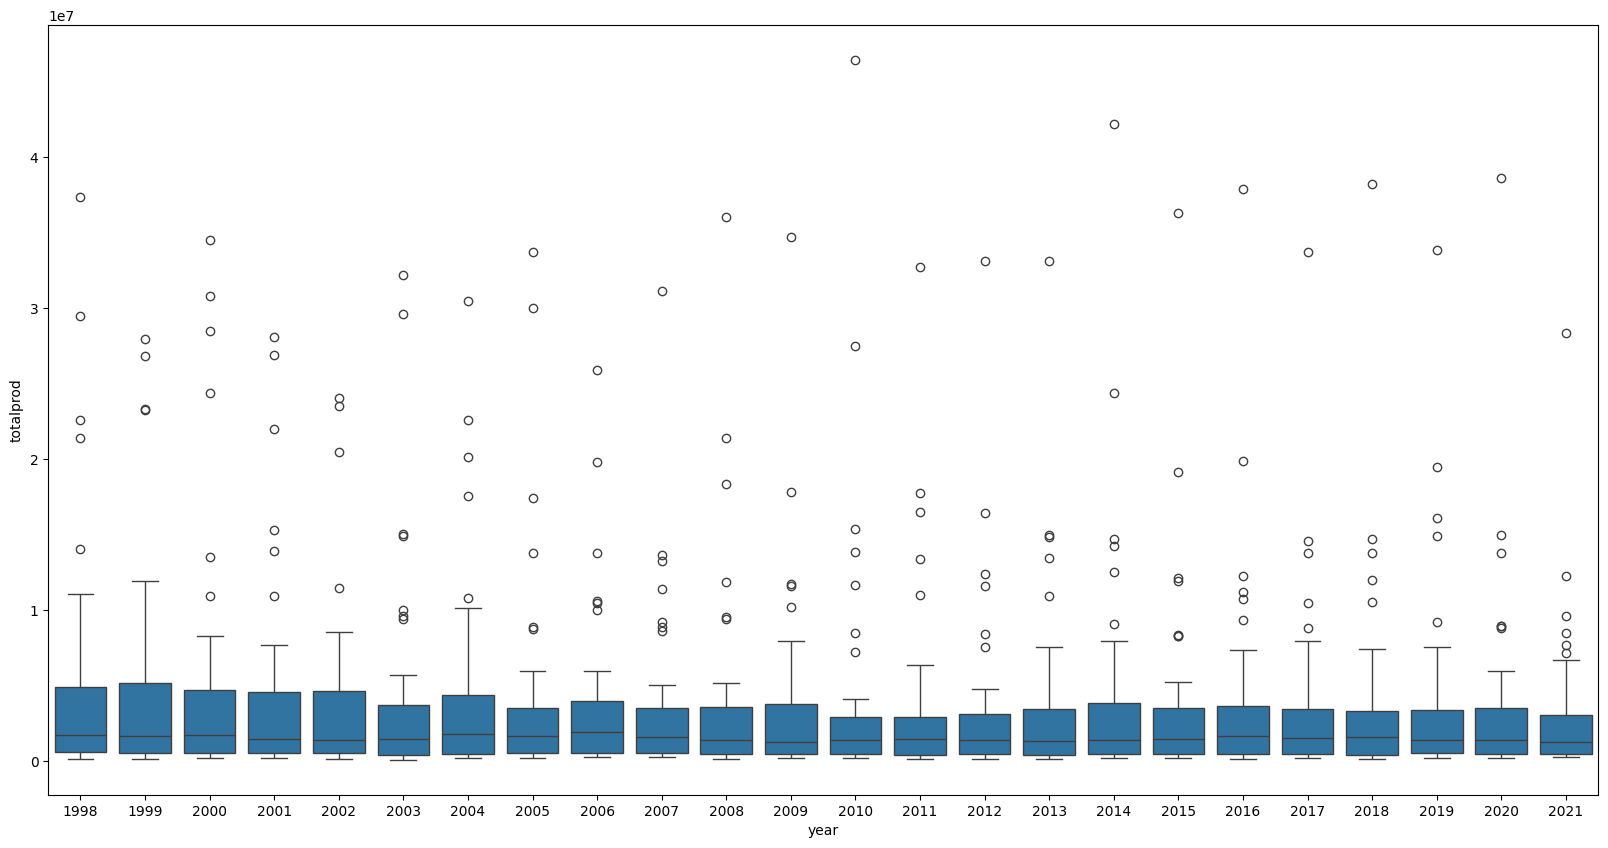

In [91]:
# Q4) Are there any patterns that can be observed between total honey production and the value of production every year?
plt.subplots(figsize=(20,10))
sns.boxplot(x='year',y='totalprod',data=df) # plot using boxplots.
plt.show()

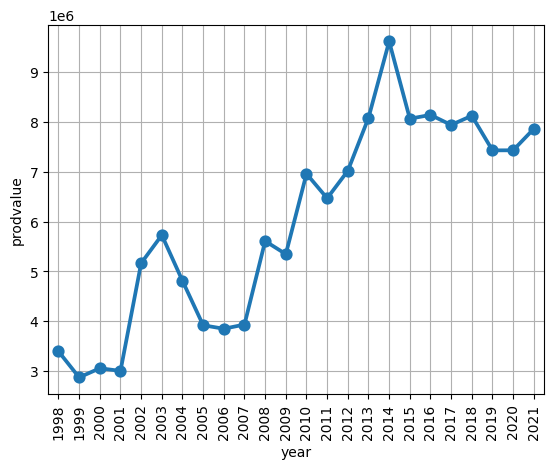

In [63]:
# Q5)How has the value of production,which in some sense could be tied to demand,changed every year?

sns.pointplot(x="year", y="prodvalue", data=df, errorbar=None)
plt.xticks(rotation=90) # To rotate the x axis labels
plt.grid()
plt.show()

In [103]:
# Q3)Does the data show any trends in terms of the number of honey-producing colonies and yield per colony before 2006,
#    which was when concern over Colony Collapse Disorder spread nation wide?
df2=df[df['year']<=2006]
df2

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.00000,71,1136000.00000,159000.00000,0.72000,818000.00000,1998
1,Arizona,55000.00000,60,3300000.00000,1485000.00000,0.64000,2112000.00000,1998
2,Arkansas,53000.00000,65,3445000.00000,1688000.00000,0.59000,2033000.00000,1998
3,California,450000.00000,83,37350000.00000,12326000.00000,0.62000,23157000.00000,1998
4,Colorado,27000.00000,72,1944000.00000,1594000.00000,0.70000,1361000.00000,1998
...,...,...,...,...,...,...,...,...
379,Virginia,8000.00000,42,336000.00000,114000.00000,2.20000,739000.00000,2006
380,Washington,49000.00000,52,2548000.00000,1605000.00000,1.24000,3160000.00000,2006
381,West Virginia,6000.00000,42,252000.00000,68000.00000,2.02000,509000.00000,2006
382,Wisconsin,64000.00000,93,5952000.00000,2500000.00000,1.12000,6666000.00000,2006


In [101]:
df3=df2.groupby('year')[['numcol','yieldpercol']].mean().reset_index()
df3

,year,numcol,yieldpercol
0,1998,60953.48837,69.95349
1,1999,61325.58140,65.46512
2,2000,60558.13953,67.58140
3,2001,57772.72727,64.54545
4,2002,58295.45455,66.79545
5,2003,58886.36364,62.54545
6,2004,61926.82927,64.80488
7,2005,58390.24390,64.26829
8,2006,58000.00000,61.85366


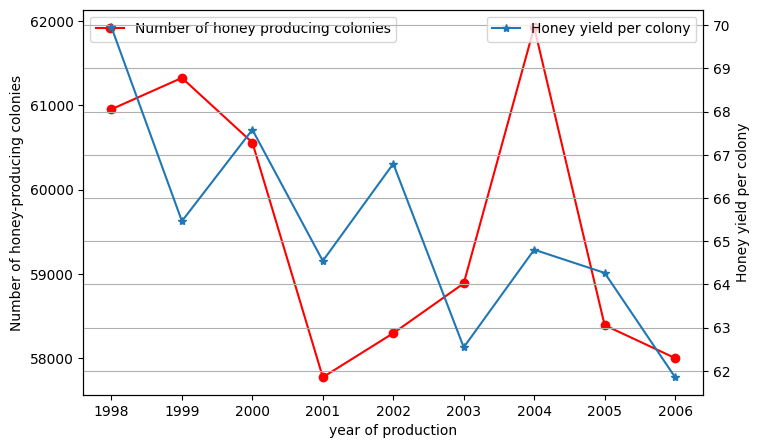

In [102]:
plt.figure(figsize=(8,5))
x1=plt.subplot(111)
x1.plot(df3.year,df3.numcol,'red',marker='o',label="Number of honey producing colonies")
x2=x1.twinx()
x2.plot(df3.year,df3.yieldpercol,marker='*',label='Honey yield per colony')
x1.set_xlabel("year of production")
x1.set_ylabel("Number of honey-producing colonies")
x2.set_ylabel('Honey yield per colony')
x1.legend()
x2.legend()
plt.grid()
plt.show()
